In [1]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarnings for clarity

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    f1_score, recall_score, roc_auc_score, roc_curve
)

from math import sqrt
from IPython.display import display

# Setting a universal plotting style for seaborn
sns.set(style="whitegrid", context="notebook")

In [2]:
# ## 1. Data Loading
# ### 1.1 Load the Dataset

def load_heart_data(path: str) -> pd.DataFrame:

    data = pd.read_csv(path)
    return data


heart_data = load_heart_data("Data/heart.csv")

# Basic preview
print("First 5 rows of the dataset:")
display(heart_data.head())

# Basic info
print("\nDataset Info:")
heart_data.info()

# Statistical description
print("\nDataset Description:")
display(heart_data.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(heart_data.isnull().sum())

First 5 rows of the dataset:


,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   trtbps   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exng     303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slp      303 non-null    int64  
 11  caa      303 non-null    int64  
 12  thall    303 non-null    int64  
 13  output   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Dataset Description:


,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Missing Values in Each Column:
age        0
sex        0
cp         0
trtbps     0
chol       0
fbs        0
restecg    0
thalach    0
exng       0
oldpeak    0
slp        0
caa        0
thall      0
output     0
dtype: int64


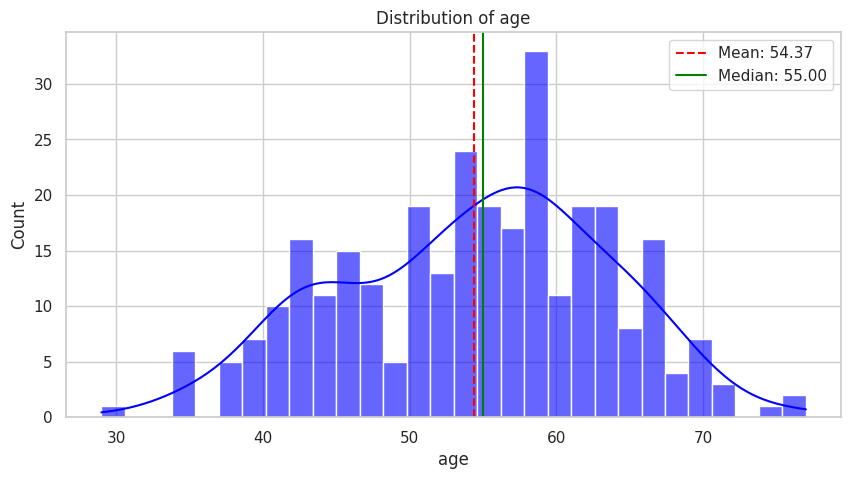

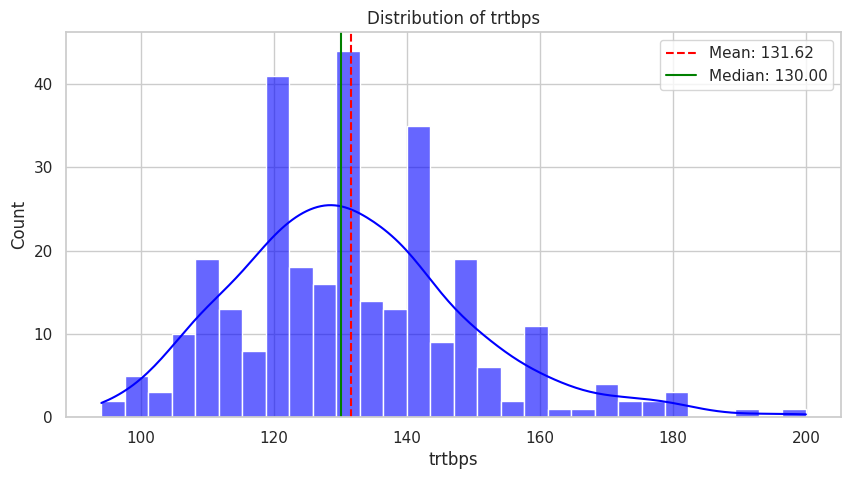

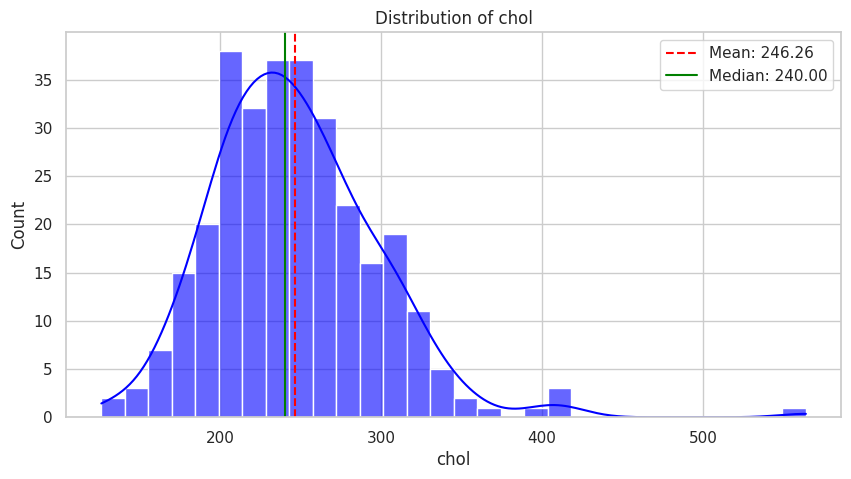

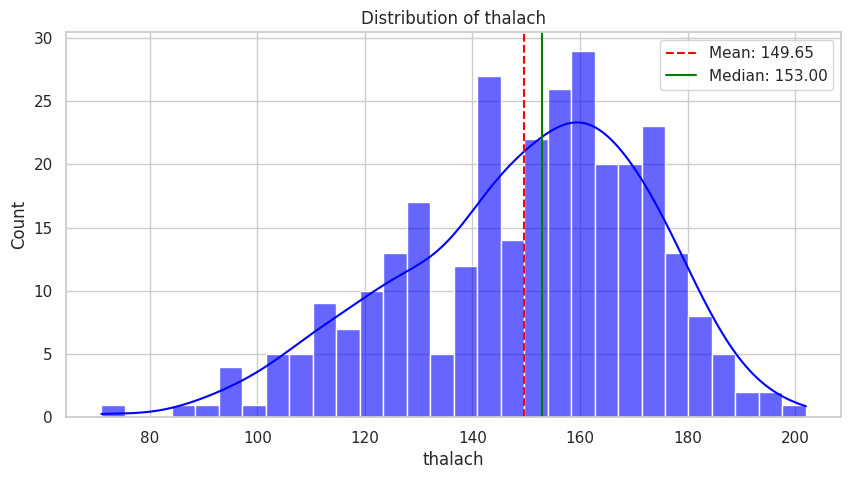

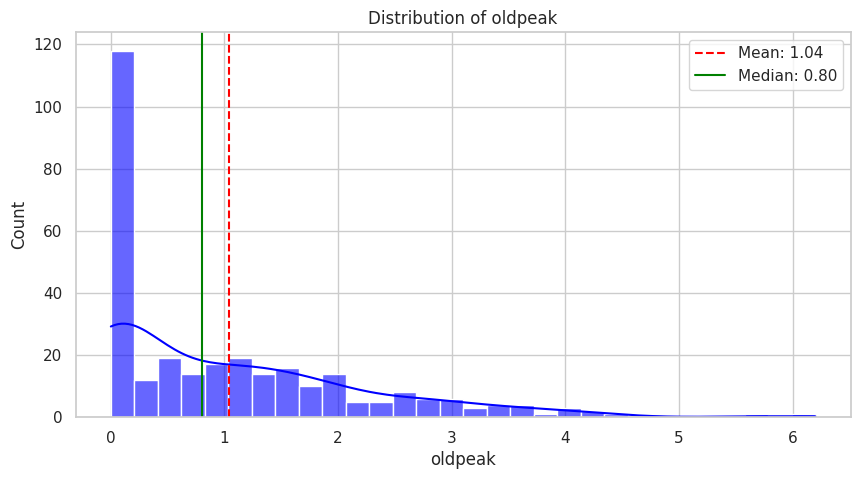

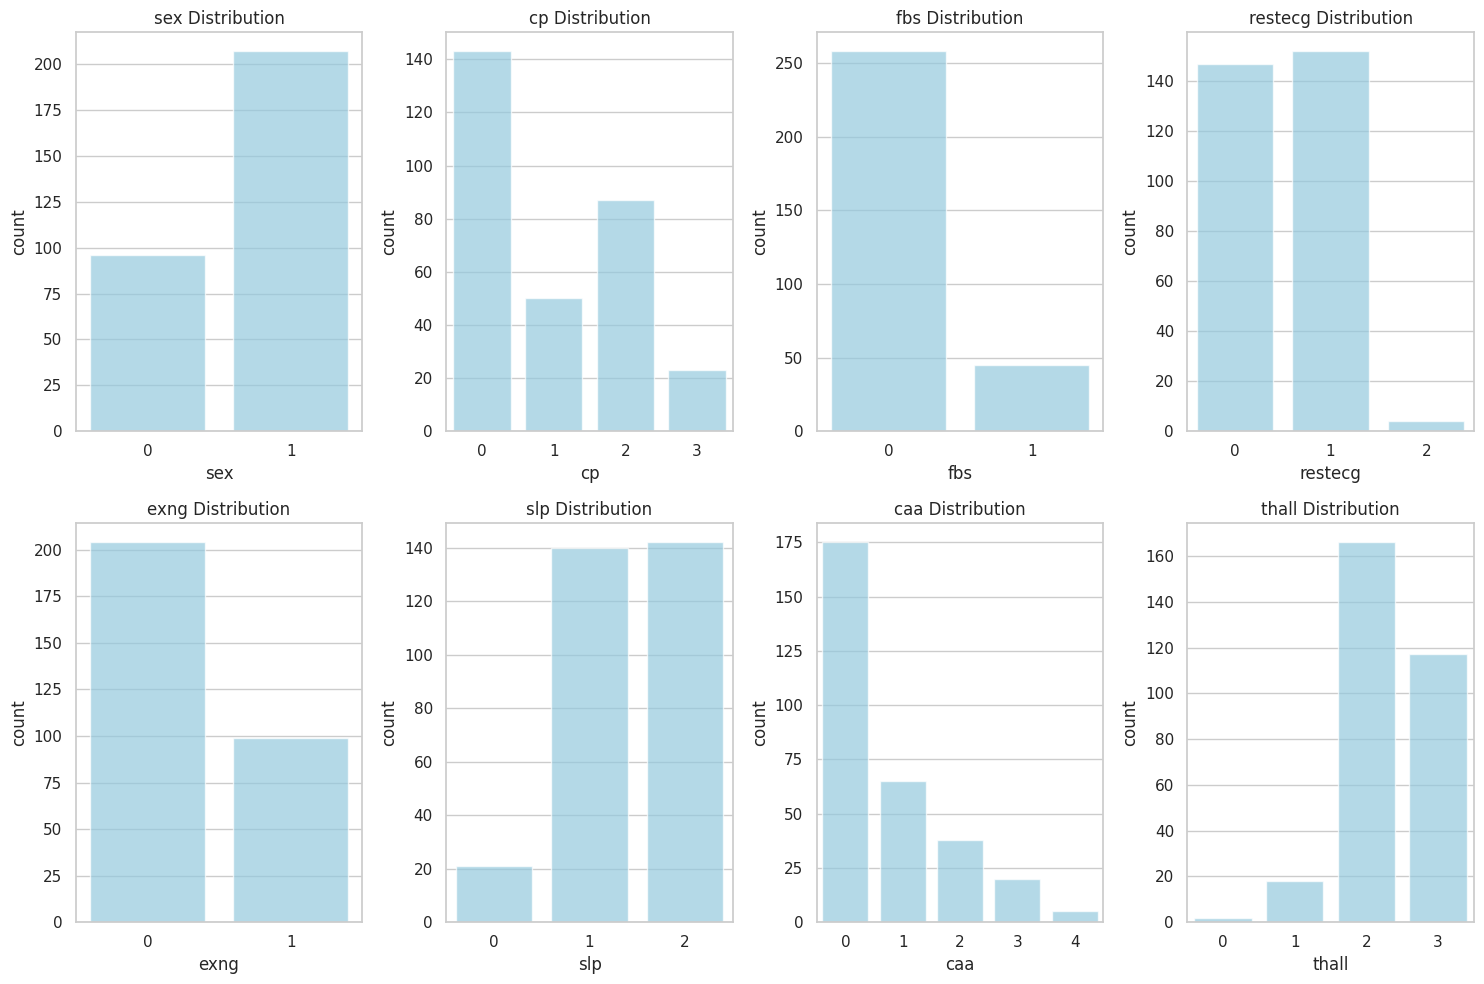

In [3]:
# ## 4. Exploratory Data Analysis (EDA)
# ### 4.1 Univariate Analysis

def plot_numeric_distribution(df: pd.DataFrame, column: str, color: str = 'blue') -> None:
    plt.figure(figsize=(10, 5))
    mean_val = df[column].mean()
    median_val = df[column].median()

    sns.histplot(df[column], bins=30, kde=True, color=color, alpha=0.6)
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend()
    plt.show()


# Numeric columns of interest
numeric_cols = ["age", "trtbps", "chol", "thalach", "oldpeak"]

for col in numeric_cols:
    plot_numeric_distribution(heart_data, col)

# Count plots for categorical columns
cat_cols = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=heart_data, x=col, color='skyblue', alpha=0.7)
    plt.title(f"{col} Distribution")
    plt.tight_layout()
plt.show()

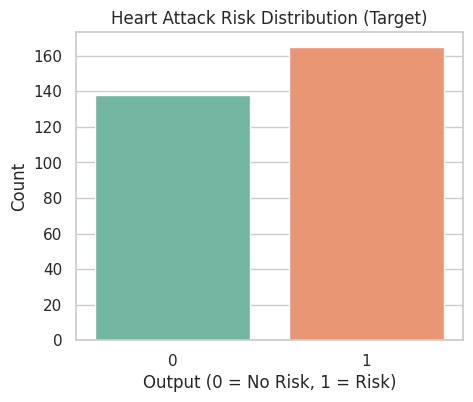

In [4]:
# Distribution of target variable
plt.figure(figsize=(5, 4))
sns.countplot(data=heart_data, x='output', palette='Set2')
plt.title("Heart Attack Risk Distribution (Target)")
plt.xlabel("Output (0 = No Risk, 1 = Risk)")
plt.ylabel("Count")
plt.show()

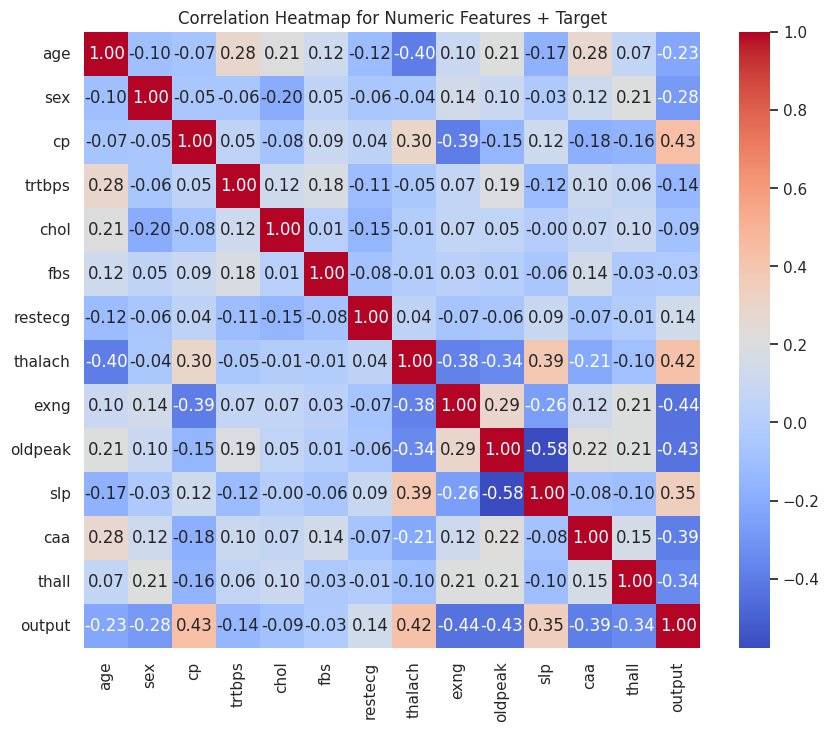

In [5]:
# ### 4.2 Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = heart_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap for Numeric Features + Target")
plt.show()

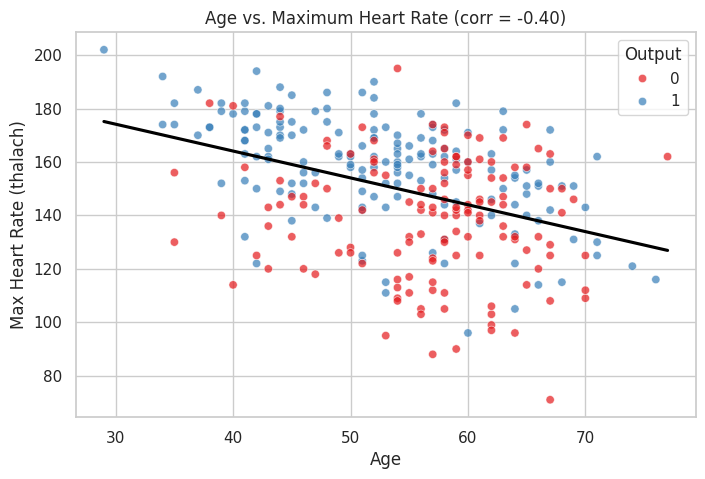

In [6]:
# ### 4.3 Bivariate Analysis
# 1) Age vs. Maximum Heart Rate
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='thalach', data=heart_data, hue='output', alpha=0.7, palette='Set1')
sns.regplot(x='age', y='thalach', data=heart_data, scatter=False, color='black', ci=None)
corr_age_thalach = heart_data['age'].corr(heart_data['thalach'])
plt.title(f"Age vs. Maximum Heart Rate (corr = {corr_age_thalach:.2f})")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.legend(title="Output")
plt.show()

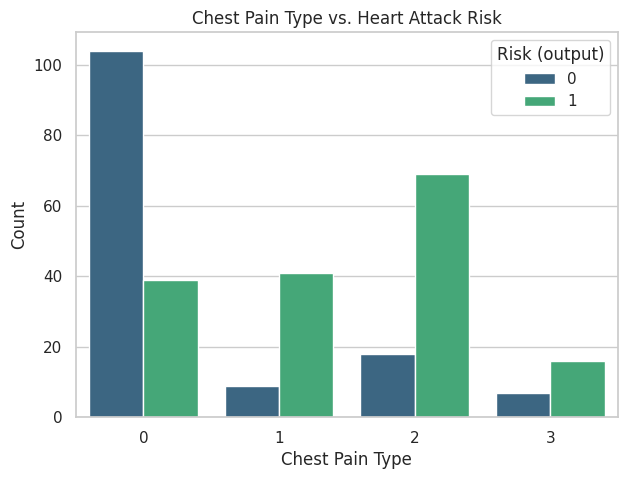

In [7]:
# 2) Chest Pain Type vs. Heart Attack Risk
plt.figure(figsize=(7, 5))
sns.countplot(data=heart_data, x='cp', hue='output', palette='viridis')
plt.title("Chest Pain Type vs. Heart Attack Risk")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Risk (output)")
plt.show()

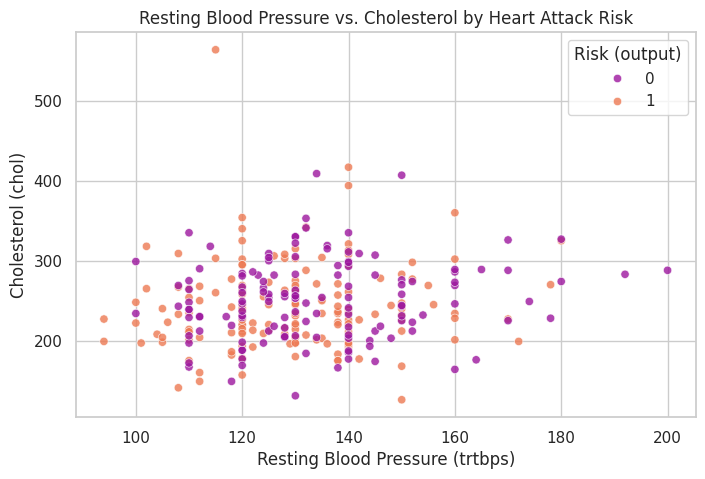

In [8]:
# 3) Resting BP vs. Cholesterol, colored by output
plt.figure(figsize=(8, 5))
sns.scatterplot(x='trtbps', y='chol', hue='output', data=heart_data, palette='plasma', alpha=0.8)
plt.title("Resting Blood Pressure vs. Cholesterol by Heart Attack Risk")
plt.xlabel("Resting Blood Pressure (trtbps)")
plt.ylabel("Cholesterol (chol)")
plt.legend(title="Risk (output)")
plt.show()

In [9]:
# ### 5.1 Feature/Target Separation
X = heart_data.drop(columns="output")
y = heart_data["output"]

In [10]:
# ### 5.2 Numeric and Categorical Columns
numeric_features = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]

In [11]:
# ### 5.3 Preprocessing Pipelines
numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
], remainder="drop")

In [12]:
# ### 5.4 Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # ensures balanced distribution of the target
)

print(f"Training set size: {X_train.shape[0]} rows, Test set size: {X_test.shape[0]} rows")

Training set size: 242 rows, Test set size: 61 rows


In [13]:
def evaluate_model(model_name: str, y_true, y_pred) -> None:
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate additional metrics
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred) if len(set(y_true)) > 1 else None

    # Print metrics
    print(f"\n--- {model_name} Evaluation ---")
    print(f"Confusion Matrix:\n{cm}")
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")
    print(f"Accuracy:   {acc:.4f}")
    print(f"F1 Score:   {f1:.4f}")
    print(f"Recall:     {recall:.4f}")
    print(f"ROC AUC:    {auc if auc else 'N/A'}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [14]:
# Create pipelines for each model
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("dt", DecisionTreeClassifier(random_state=42))
])

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
])

lr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lr", LogisticRegression(max_iter=2000, random_state=42))
])

In [15]:
# Train the models
dt_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trtbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exng', 'slp',
                                                   'caa', 'thall'])])),
                ('lr', LogisticRegression(max_iter=2000, random_state=42))])

In [16]:
models = {
    "Decision Tree": dt_pipeline,
    "Random Forest": rf_pipeline,
    "Logistic Regression": lr_pipeline
}

In [17]:
for model_name, model_pipeline in models.items():
    preds = model_pipeline.predict(X_test)
    evaluate_model(model_name, y_test, preds)


--- Decision Tree Evaluation ---
Confusion Matrix:
[[20  8]
 [ 7 26]]
True Positives (TP): 26
False Positives (FP): 8
True Negatives (TN): 20
False Negatives (FN): 7
Accuracy:   0.7541
F1 Score:   0.7761
Recall:     0.7879
ROC AUC:    0.751082251082251

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61


--- Random Forest Evaluation ---
Confusion Matrix:
[[19  9]
 [ 2 31]]
True Positives (TP): 31
False Positives (FP): 9
True Negatives (TN): 19
False Negatives (FN): 2
Accuracy:   0.8197
F1 Score:   0.8493
Recall:     0.9394
ROC AUC:    0.808982683982684

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
      

In [18]:
# ## 7. Cross-Validation

def cross_validate_model(model_pipeline, X, y, model_name: str, cv_folds=5) -> None:
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model_pipeline, X, y, cv=cv, scoring='accuracy')
    print(f"\n{model_name} - {cv_folds}-Fold Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean():.4f} | Std Dev: {cv_scores.std():.4f}")


for model_name, model_pipeline in models.items():
    cross_validate_model(model_pipeline, X, y, model_name, cv_folds=5)


Decision Tree - 5-Fold Cross-Validation Accuracy Scores: [0.78688525 0.73770492 0.80327869 0.7        0.68333333]
Mean Accuracy: 0.7422 | Std Dev: 0.0469

Random Forest - 5-Fold Cross-Validation Accuracy Scores: [0.91803279 0.83606557 0.75409836 0.83333333 0.81666667]
Mean Accuracy: 0.8316 | Std Dev: 0.0524

Logistic Regression - 5-Fold Cross-Validation Accuracy Scores: [0.95081967 0.85245902 0.7704918  0.88333333 0.86666667]
Mean Accuracy: 0.8648 | Std Dev: 0.0580


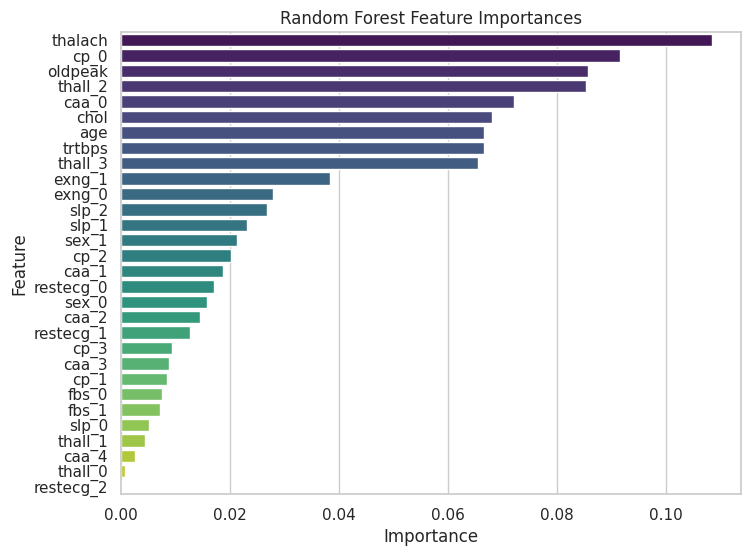

,feature,importance
3,thalach,0.108444
7,cp_0,0.091686
4,oldpeak,0.085705
28,thall_2,0.085414
21,caa_0,0.072121
2,chol,0.068158
0,age,0.066612
1,trtbps,0.066595
29,thall_3,0.065476
17,exng_1,0.038287


In [19]:
# ### 8.1 Random Forest Feature Importances
rf_model_full = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_model_full.fit(X, y)

# Extract the underlying RandomForest model
rf_estimator = rf_model_full.named_steps['rf']

# Get the one-hot-encoded feature names
encoded_cat_cols = (
    rf_model_full.named_steps['preprocessor']
    .named_transformers_['cat']
    .named_steps['encoder']
    .get_feature_names_out(categorical_features)
)

all_feature_names = numeric_features + list(encoded_cat_cols)
importances = rf_estimator.feature_importances_

feat_imp_df = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feat_imp_df, x="importance", y="feature", palette="viridis")
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

display(feat_imp_df)

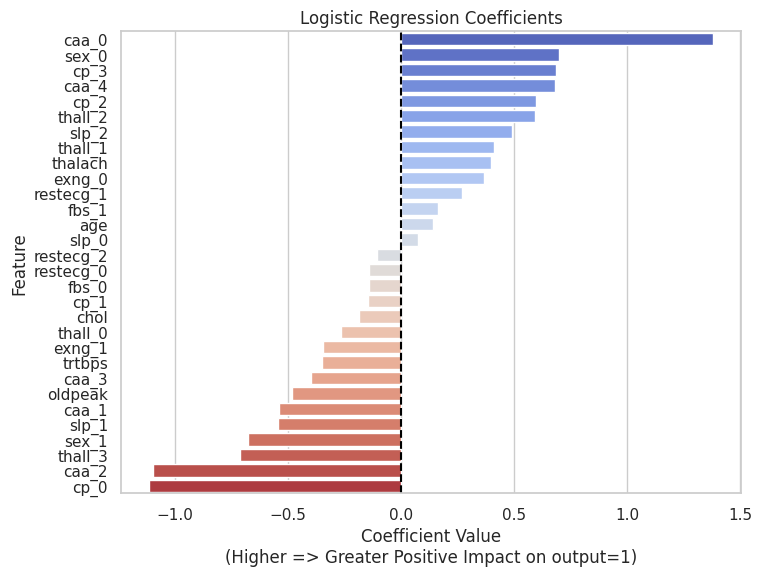

,feature,coefficient
21,caa_0,1.379370
5,sex_0,0.700052
10,cp_3,0.682961
25,caa_4,0.680118
9,cp_2,0.596281
28,thall_2,0.592218
20,slp_2,0.490631
27,thall_1,0.408385
3,thalach,0.397309
16,exng_0,0.368436


In [20]:
# ### 8.2 Logistic Regression Coefficients
lr_model_full = Pipeline([
    ("preprocessor", preprocessor),
    ("lr", LogisticRegression(max_iter=2000, random_state=42))
])
lr_model_full.fit(X, y)

lr_estimator = lr_model_full.named_steps['lr']
coeffs = lr_estimator.coef_[0]

lr_coef_df = pd.DataFrame({
    "feature": all_feature_names,
    "coefficient": coeffs
}).sort_values(by="coefficient", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=lr_coef_df, x="coefficient", y="feature", palette="coolwarm")
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value\n(Higher => Greater Positive Impact on output=1)")
plt.ylabel("Feature")
plt.axvline(0, color='black', linestyle='--')
plt.show()

display(lr_coef_df)

In [21]:
# ## 9. Hyperparameter Tuning
# GridSearchCV Random Forest for optimal hyperparameters.
# search for `n_estimators` and `max_depth`.

param_grid = {
    "rf__n_estimators": [50, 100, 150],
    "rf__max_depth": [None, 5, 10]
}

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score:  {grid_search.best_score_:.4f}")

best_rf_model = grid_search.best_estimator_

# Evaluate on the test set
test_preds = best_rf_model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print(f"Random Forest (GridSearchCV) Test Accuracy: {test_acc:.4f}")

# - fine-tune for even better performance.
# - more parameters (e.g., `min_samples_split`, `min_samples_leaf`, etc.) / try RandomizedSearchCV for bigger search space.

Best Params: {'rf__max_depth': 5, 'rf__n_estimators': 150}
Best Score:  0.8433
Random Forest (GridSearchCV) Test Accuracy: 0.8197
